In [85]:
import os 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [266]:
patches_path = '../dataset/training_patches'
labels_path = '../dataset/training_noisy_labels'

band_values = []

for filename in os.listdir(patches_path):
    if filename.endswith('.png'):
        # Open the image file
        img = Image.open(os.path.join(patches_path, filename))
        
        # Convert the image to a numpy array and get the band values
        band_values.append(np.array(img))

# Convert the list of band values to a numpy array
band_values = np.array(band_values)

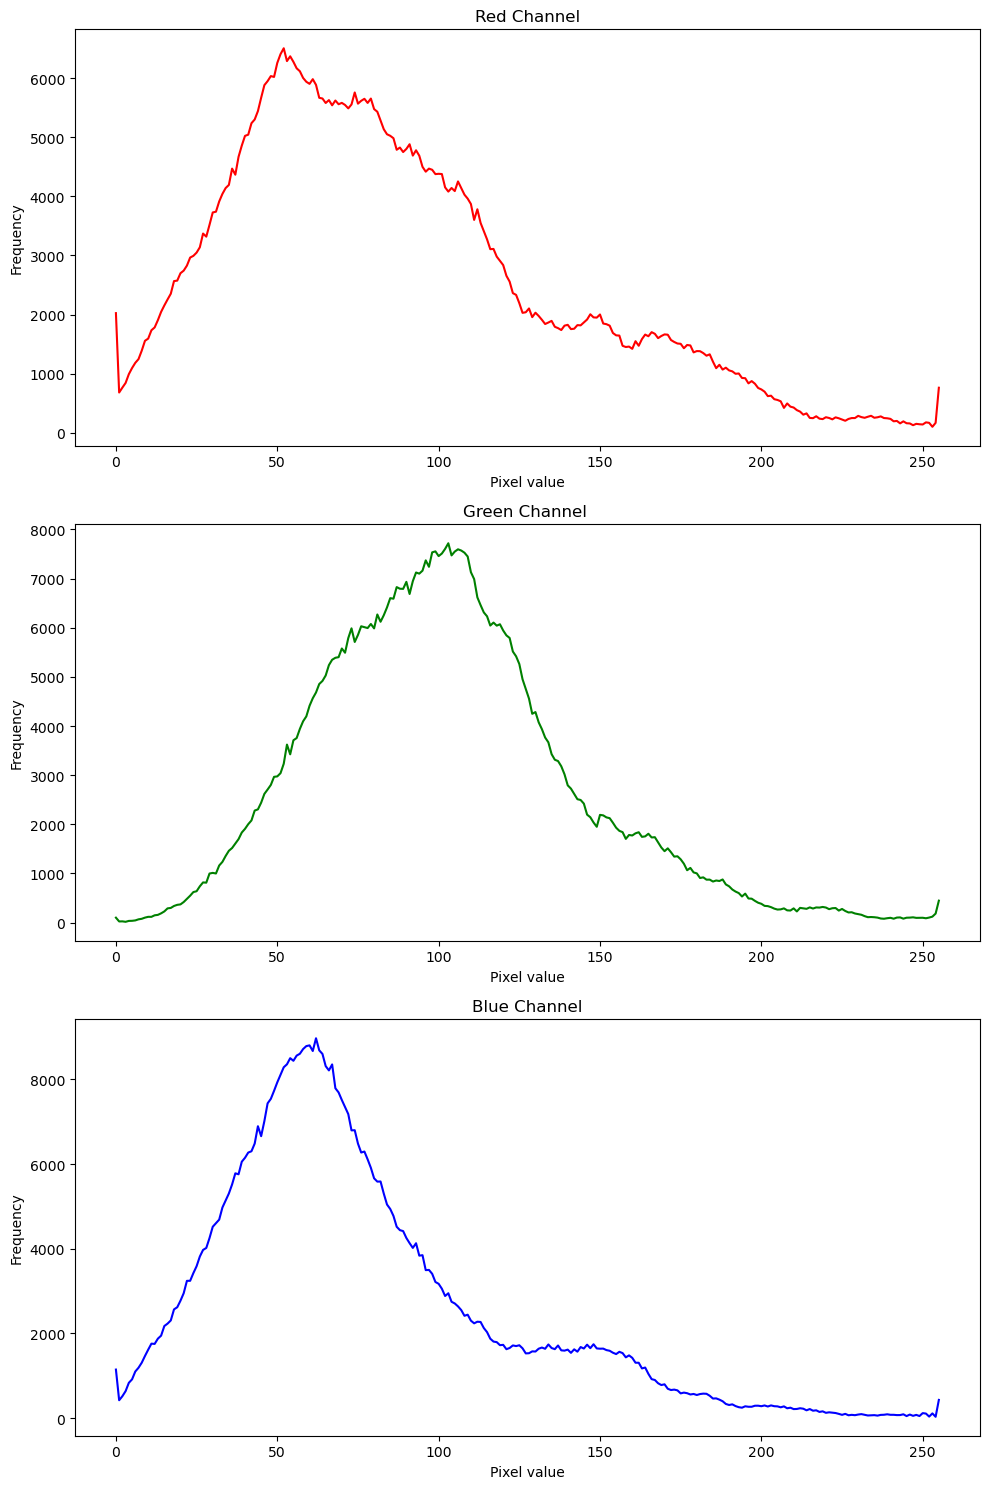

In [265]:

# Calculate histograms for each channel
hist_red = np.histogram(band_values[4000:4010, :, :, 0], bins=256, range=(0, 256))[0]
hist_green = np.histogram(band_values[4000:4010, :, :, 1], bins=256, range=(0, 256))[0]
hist_blue = np.histogram(band_values[4000:4010, :, :, 2], bins=256, range=(0, 256))[0]

# Plot the histograms using subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].plot(hist_red, color='red')
axs[0].set_title('Red Channel')
axs[0].set_xlabel('Pixel value')
axs[0].set_ylabel('Frequency')

axs[1].plot(hist_green, color='green')
axs[1].set_title('Green Channel ')
axs[1].set_xlabel('Pixel value')
axs[1].set_ylabel('Frequency')

axs[2].plot(hist_blue, color='blue')
axs[2].set_title('Blue Channel')
axs[2].set_xlabel('Pixel value')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [29]:
patch_names = os.listdir(patches_path)
patch_names = [name for name in patch_names if name.endswith('.png')]

In [101]:
def plot_patch_label(axs, patch_name, patches_path, labels_path):
    patch_path = os.path.join(patches_path, patch_name)
    label_path = os.path.join(labels_path, patch_name)

    # Plot the image
    patch = Image.open(patch_path)
    label = Image.open(label_path)
    
    axs[0].imshow(patch)
    axs[1].imshow(label)
    axs[0].set_title('Patch - ' + patch_name)
    axs[1].set_title('Label' + patch_name)

def plot_n_random_patches(patch_names, patches_path, labels_path, n=3):
    if n > 5:
        raise ValueError('The maximum number of patches to plot is 5')
    patches = np.random.choice(patch_names, n, replace=False)

    fig, axs = plt.subplots(n, 2, figsize=(10, 5 * n))

    for i, patch_name in enumerate(patches):
        plot_patch_label(axs[i], patch_name, patches_path, labels_path)

    plt.tight_layout()
    plt.show()

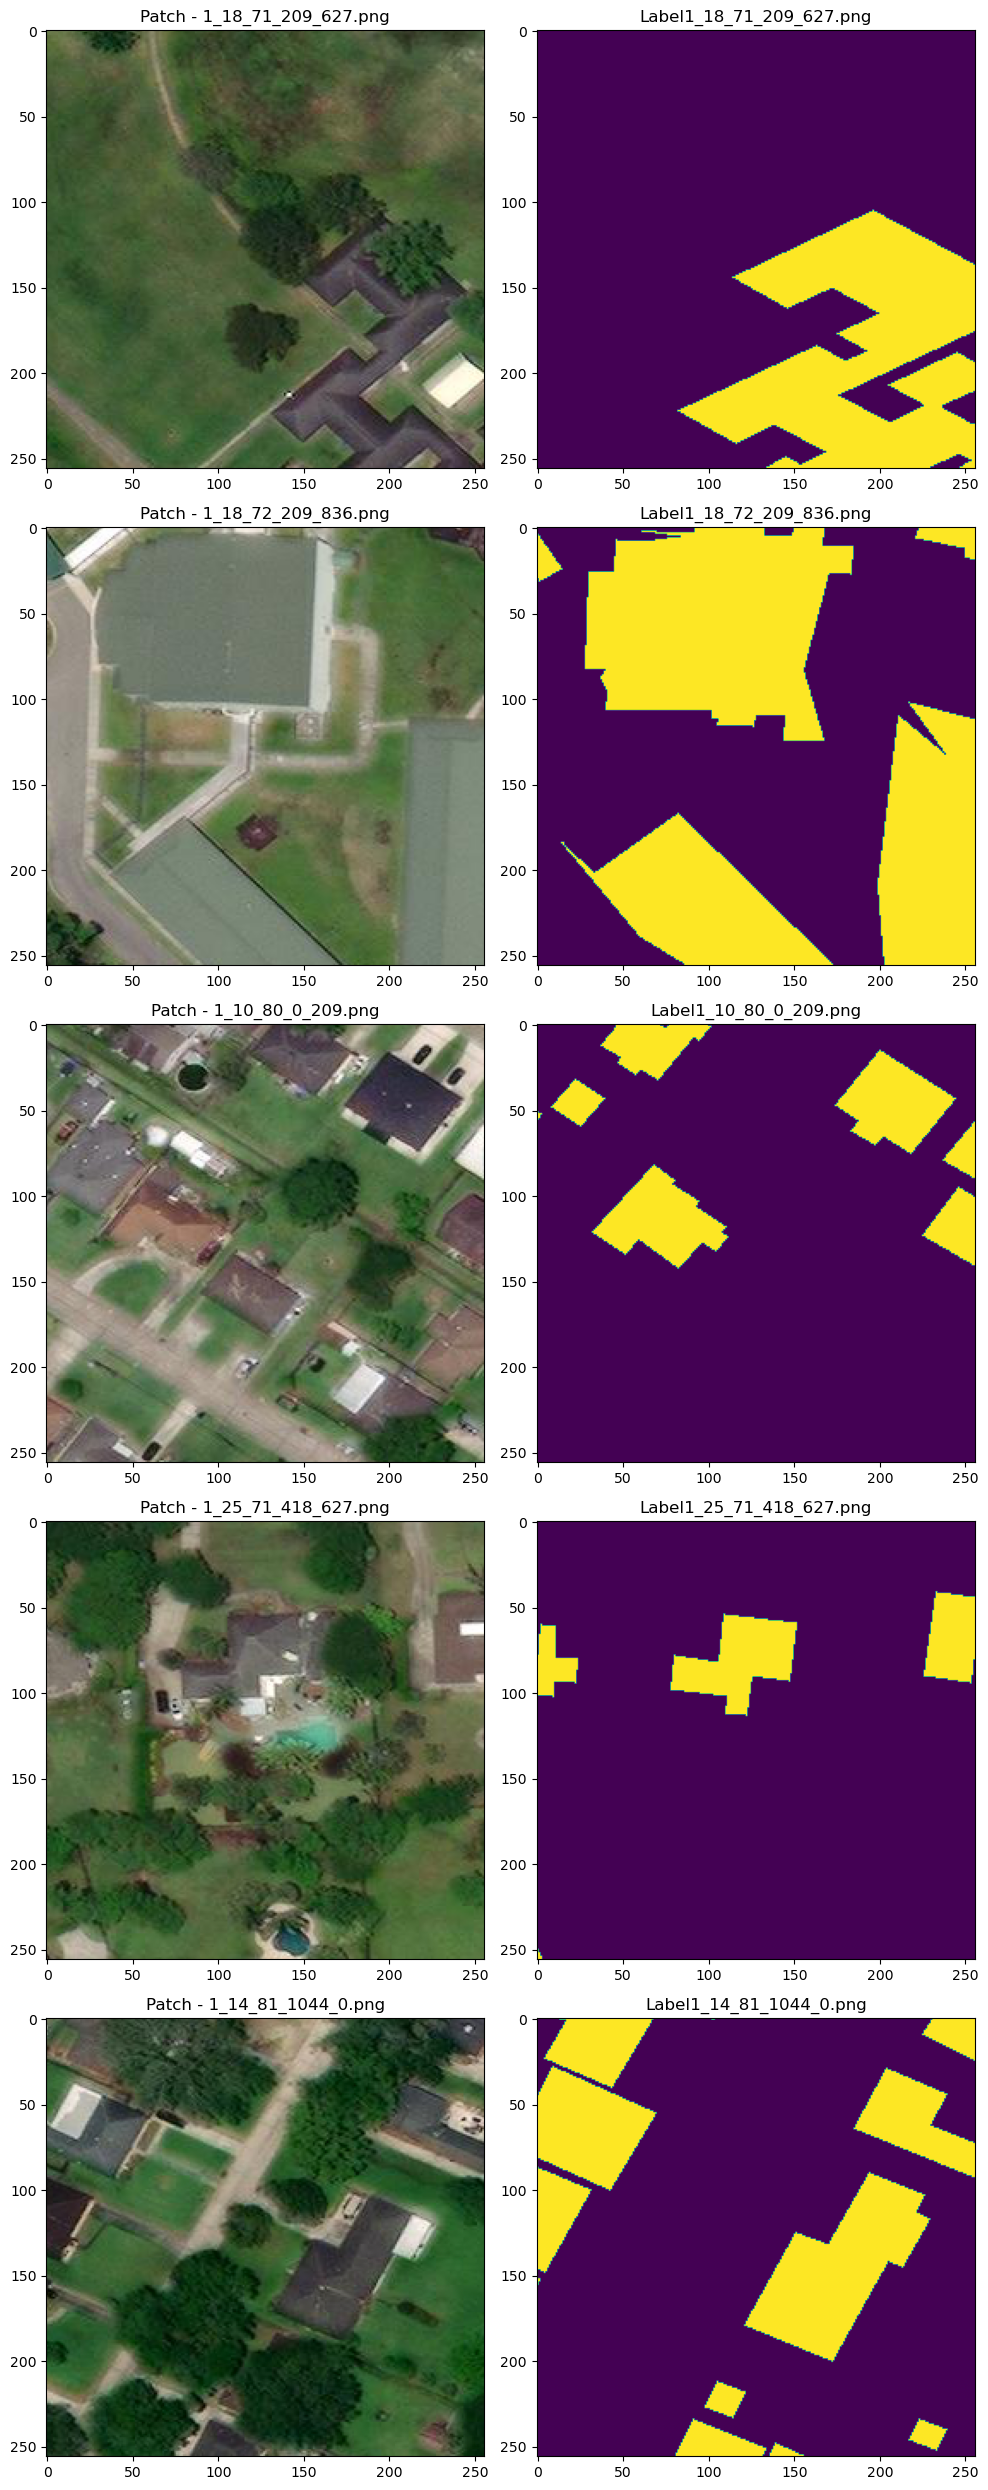

In [261]:
plot_n_random_patches(patch_names, patches_path, labels_path, n=5)

In [71]:
labels_path = '../dataset/training_noisy_labels'

label_values = []

for filename in os.listdir(labels_path):
    if filename.endswith('.png'):
        # Open the image file
        img = Image.open(os.path.join(labels_path, filename))
        
        # Convert the image to a numpy array and get the band values
        label_values.append(np.array(img))

# Convert the list of band values to a numpy array
label_values = np.array(label_values)

In [74]:

n_label_pixels = np.sum(label_values, axis=(1, 2))
label_perc = n_label_pixels/(256 * 256)

In [78]:
label_perc_series = pd.Series(label_perc)
label_perc_series.describe()

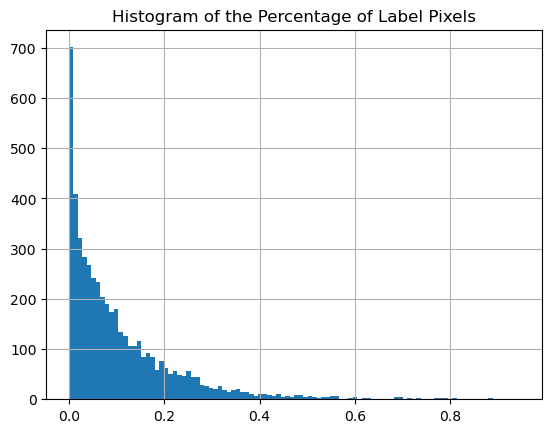

In [90]:
label_perc_series.hist(bins=100)
plt.title('Histogram of the Percentage of Label Pixels')
plt.show()

Does this make sense? What can we do with this information if we now that buildings can randomly be missing. 

In [91]:
label_perc_series.describe()

count    5000.000000
mean        0.106193
std         0.119224
min         0.000000
25%         0.023067
50%         0.068245
75%         0.147984
max         0.945923
dtype: float64

In [108]:
max_label_perc = np.argmax(label_perc)
min_label_perc = np.argmin(label_perc)

Text(0.5, 1.0, 'Label1_16_81_0_627.png')

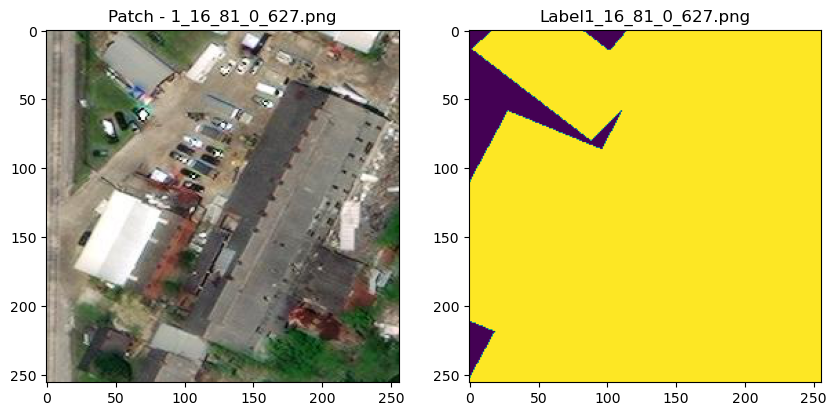

In [109]:
patch_path = os.path.join(patches_path, patch_names[max_label_perc])
label_path = os.path.join(labels_path, patch_names[max_label_perc])

# Plot the image
patch = Image.open(patch_path)
label = Image.open(label_path)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(patch)
axs[1].imshow(label)
axs[0].set_title('Patch - ' + patch_names[max_label_perc])
axs[1].set_title('Label' + patch_names[max_label_perc])

Text(0.5, 1.0, 'Label1_19_78_836_209.png')

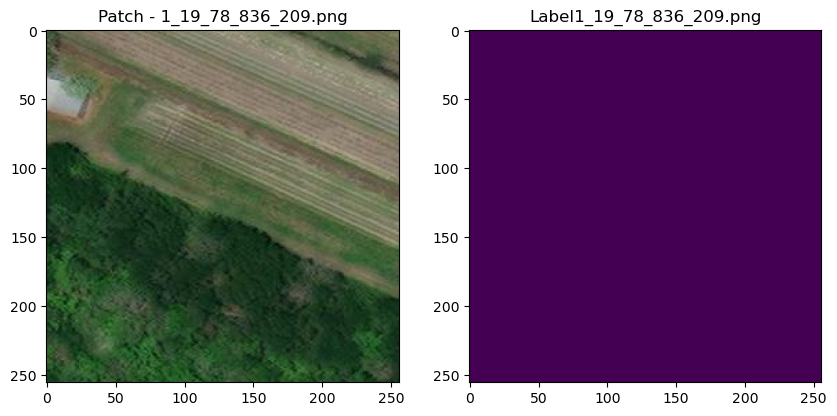

In [110]:
patch_path = os.path.join(patches_path, patch_names[min_label_perc])
label_path = os.path.join(labels_path, patch_names[min_label_perc])

# Plot the image
patch = Image.open(patch_path)
label = Image.open(label_path)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(patch)
axs[1].imshow(label)
axs[0].set_title('Patch - ' + patch_names[min_label_perc])
axs[1].set_title('Label' + patch_names[min_label_perc])

In [114]:
mean_label_perc = np.mean(label_perc)
diff = label_perc - mean_label_perc

In [116]:
closest_to_mean_label = np.argmin(np.abs(diff))

Text(0.5, 1.0, 'Label0_25_68_0_0.png')

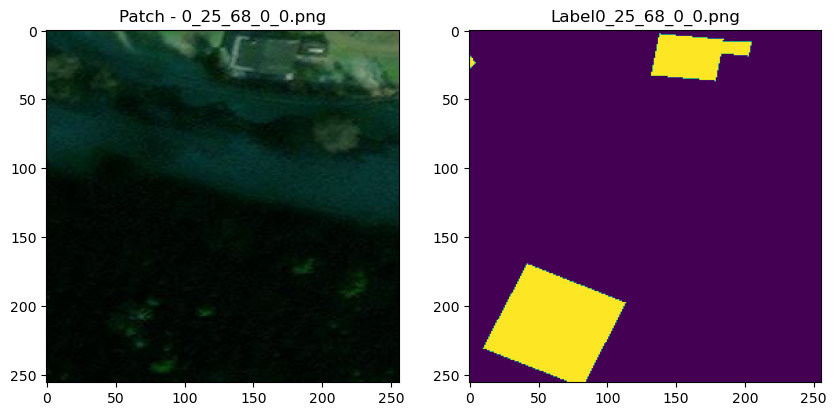

In [117]:
patch_path = os.path.join(patches_path, patch_names[closest_to_mean_label])
label_path = os.path.join(labels_path, patch_names[closest_to_mean_label])

# Plot the image
patch = Image.open(patch_path)
label = Image.open(label_path)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(patch)
axs[1].imshow(label)
axs[0].set_title('Patch - ' + patch_names[closest_to_mean_label])
axs[1].set_title('Label' + patch_names[closest_to_mean_label])

# Exploration of the file names 

In [147]:
file_names = os.listdir(patches_path)
file_names = [name for name in file_names if name.endswith('.png')]

In [148]:
split_strings = [name.split('_') for name in file_names]

In [151]:

df_split_strings = pd.DataFrame(split_strings)
df_split_strings[4] = df_split_strings[4].str.replace('.png', '')

In [188]:
df_split_strings.head()

,0,1,2,3,4
0,1,9,87,418,0
1,0,40,59,1044,1044
2,2,21,41,0,836
3,1,12,105,209,1044
4,2,15,49,836,418


In [189]:
df_split_strings.describe()

,0,1,2,3,4
count,5000,5000,5000,5000,5000
unique,3,43,95,6,6
top,1,15,79,1044,836
freq,2533,367,202,854,867


In [192]:
df_groupby_highest_unique = df_split_strings.groupby(0).agg(lambda x: x.unique().tolist())

In [262]:
df_split_strings[0].value_counts()

0
1    2533
0    1449
2    1018
Name: count, dtype: int64

In [236]:
df_groupby_highest_unique

,1,2,3,4
0,,,,
0,"[40, 23, 18, 27, 12, 22, 16, 19, 21, 15, 28, 2...","[59, 70, 69, 62, 4, 5, 17, 68, 21, 8, 61, 66, ...","[1044, 836, 627, 418, 0, 209]","[1044, 836, 209, 0, 627, 418]"
1,"[9, 12, 10, 7, 19, 4, 11, 22, 6, 25, 13, 16, 8...","[87, 105, 79, 78, 97, 103, 86, 95, 71, 82, 81,...","[418, 209, 836, 0, 1044, 627]","[0, 1044, 836, 209, 627, 418]"
2,"[21, 15, 19, 17, 18, 20, 13, 26, 23, 27, 16, 1...","[41, 49, 55, 44, 53, 36, 57, 60, 46, 56, 54, 3...","[0, 836, 209, 418, 1044, 627]","[836, 418, 627, 209, 0, 1044]"


In [211]:
x = np.array(df_groupby_highest_unique[4].to_list())
for i in range(x.shape[0]):
    x[i] = sorted(x[i])
x

array([['0', '1044', '209', '418', '627', '836'],
       ['0', '1044', '209', '418', '627', '836'],
       ['0', '1044', '209', '418', '627', '836']], dtype='<U4')

In [214]:
x = np.array(df_groupby_highest_unique[3].to_list())
for i in range(x.shape[0]):
    x[i] = sorted(x[i])
x

array([['0', '1044', '209', '418', '627', '836'],
       ['0', '1044', '209', '418', '627', '836'],
       ['0', '1044', '209', '418', '627', '836']], dtype='<U4')

In [254]:
x = np.array(df_groupby_highest_unique[2])

In [259]:
x

array([list(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '3', '4', '5', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '8', '9']),
       list(['100', '101', '102', '103', '104', '105', '106', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']),
       list(['33', '34', '35', '36', '37', '38', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '65'])],
      dtype=object)

In [258]:
x_flattened = np.concatenate(x)
x_flattened = x_flattened.astype(int)
x_flattened.sort()
x_flattened

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  33,  34,  35,  36,
        37,  38,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  57,  58,  58,  59,  59,  60,
        60,  61,  61,  62,  62,  63,  63,  64,  65,  65,  66,  67,  68,
        69,  70,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106])

In [260]:
x = np.array(df_groupby_highest_unique[1])
x_flattened = np.concatenate(x)
x_flattened = x_flattened.astype(int)
x_flattened.sort()
x_flattened

array([ 3,  4,  5,  6,  7,  8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 13,
       14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19,
       19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25,
       25, 26, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [223]:
def plot_multiple_patches(patch_names, patches_path, labels_path):
    patches = patch_names

    fig, axs = plt.subplots(len(patches), 2, figsize=(10, 5 * len(patches)))

    for i, patch_name in enumerate(patches):
        plot_patch_label(axs[i], patch_name, patches_path, labels_path)

    plt.tight_layout()
    plt.show()

In [229]:
select_patches = ['2_28_33_0_0.png', '2_29_38_0_418.png']

FileNotFoundError: [Errno 2] No such file or directory: '/home/gentleprotector/ubs_ws24/UBS-lcc-contest/dataset/training_patches/2_29_38_0_418.png'

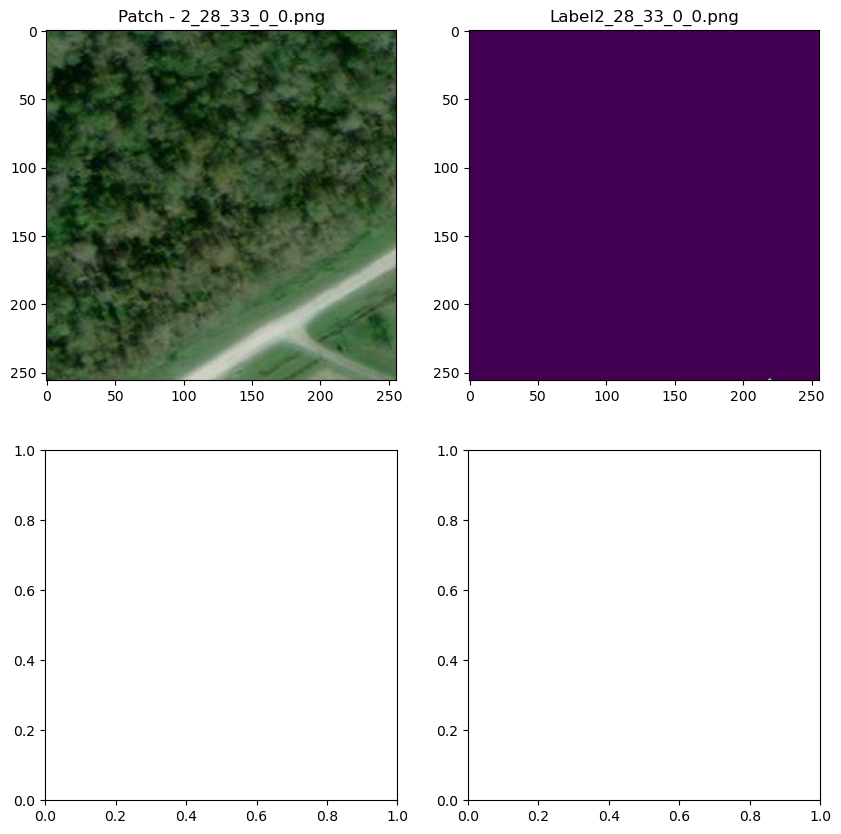

In [230]:
plot_multiple_patches(select_patches, patches_path, labels_path)

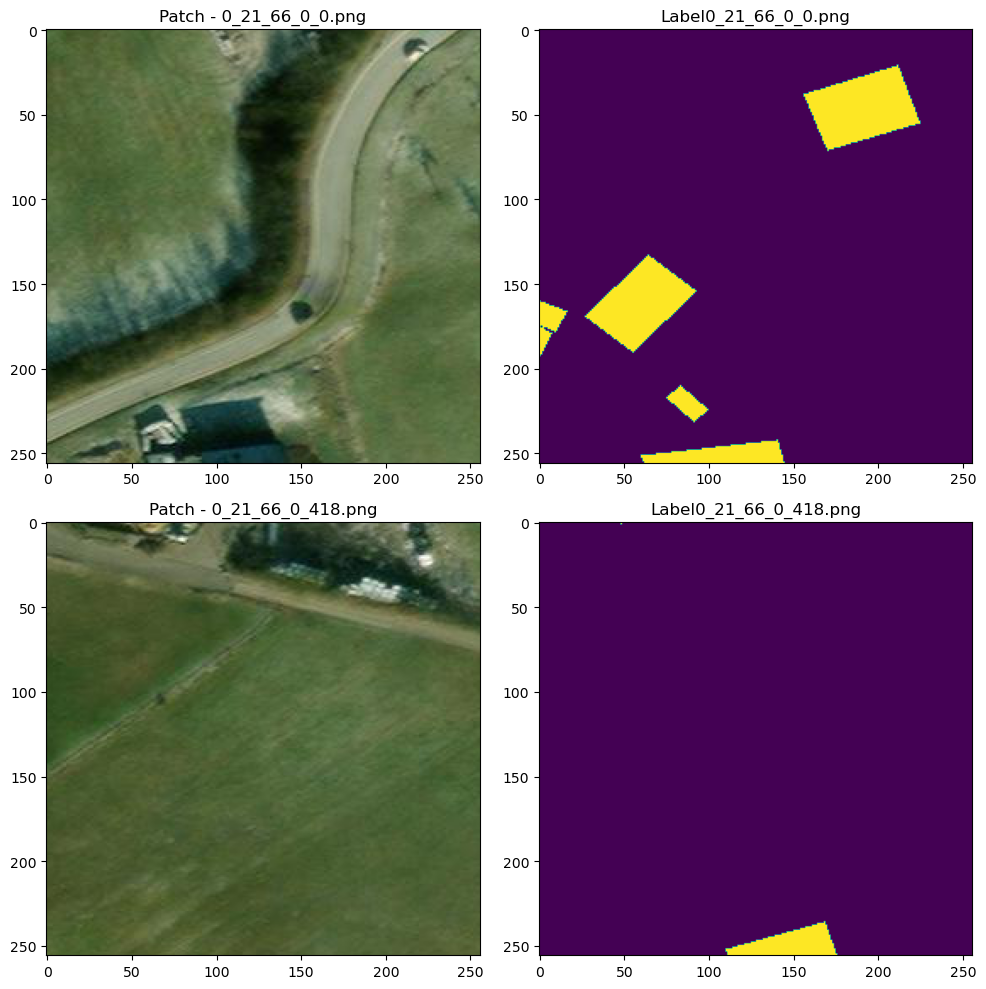

In [232]:
select_patches = ['2_28_33_0_0.png', '2_28_33_0_418.png', '2_28_33_209_418.png']
plot_multiple_patches(select_patches, patches_path, labels_path)